## **PREDICCION DE ENFERMEDAD CARDIACA**


Uso del  Heart Disease Data Set para ejercicio de prediccion


## Preprocesamiento de dataset

Import de dependencias

In [1]:
import pandas as pd 
from pandas import read_csv

### Descripcion del Dataset Heart Disease

1.   EDAD : Edad del individuo
2.   SEX : Sexo del individuo
3.   TD: Tipo de dolor de pecho 1-tipico, 2-No tipico, 3-No dolor, 4 -Asintomatico
4.   PSD : Presion arterial en reposo
5.   COL : Nivel de colesterol
6.   AZA: Nivel de azucar en la sangre en ayuno 1-Si es superior a 120mg/dl, 0-Si es inferior
7.   ELE: Eletrocardiograma 0-Normal, 1 y 2 Anormal
8.   FCO: Frecuencia cardiaca objetivo
9.   AIE:  Angina inducida por el ejercicio 1-Si, 0-No
10.  DST: Depresion en el segmento ST Electrocardiograma 
11.  PEN: Pendiente de segmento ST en ejercicio 1-Sube, 2-Plano, 3-Baja.
12.  VAS: Numero de vasos (0-3) coloreados por fluoroscopia
13.  TAL: Talasemia 3-Normal, 6-Defecto permanente, 7-Defecto reversible
14.  RES: Enfermedad cardiaca.  Mayor a 0 no hay enfermedad cardiaca

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ["EDAD", "SEXO", "TD", "PSD", "COL","AZA", "ELE", "FCO","AIE", "DST","PEN", "VAS", "TAL", "RES"]
dataset = pd.read_csv(url, names=names)

Inspeccion de primeros 5

In [3]:
dataset.head(5)

,EDAD,SEXO,TD,PSD,COL,AZA,ELE,FCO,AIE,DST,PEN,VAS,TAL,RES
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Dimension del dataset

In [4]:
dataset.shape

(303, 14)

Inspeccion de tipo de datos de cada columna.

In [5]:
dataset.dtypes

EDAD    float64
SEXO    float64
TD      float64
PSD     float64
COL     float64
AZA     float64
ELE     float64
FCO     float64
AIE     float64
DST     float64
PEN     float64
VAS      object
TAL      object
RES       int64
dtype: object

Se sospecha que las columnas VAS, y TAL podrian contener datos faltantes

In [6]:
cols = dataset.columns[dataset.dtypes.eq(object)]
cols

Index(['VAS', 'TAL'], dtype='object')

Se convierte los datos de las columnas VAS, y TAL en valores numericos; cualquier dato que no se pueda convertir se transforma en un NaN

In [7]:
dataset[cols] = dataset[cols].apply(pd.to_numeric, errors='coerce')
dataset.dtypes

EDAD    float64
SEXO    float64
TD      float64
PSD     float64
COL     float64
AZA     float64
ELE     float64
FCO     float64
AIE     float64
DST     float64
PEN     float64
VAS     float64
TAL     float64
RES       int64
dtype: object

Verificar existencia si hubo datos faltantes.

In [8]:
dataset.isnull().values.any()

True

Cantidad de datos faltantes

In [9]:
dataset.isnull().values.sum()

6

Como el resultado es 6, se opta por eliminar esos datos.

In [10]:
dataset = dataset.dropna()

Verificacion de la eliminacion de NaN

In [11]:
dataset.isnull().values.any()

False

Nueva dimension despues del ajuste

In [12]:
dataset.shape

(297, 14)

Las variable RES muestra la condicion cardiaca de la muestra. Un valor 0 indica que la persona tiene enfermedad cardiaca, valores 1,2,3 y 4 indican que no posee esa condicion. Los datos se consolidan para que muestren 0 si es positivo para enfermedad y si los datos son 1,2,3 y 4 mostrara un 1, indicando negativo para enfermedad cardiaca.

In [13]:
dataset.loc[dataset['RES'] == 0, 'RES'] = 0
dataset.loc[(dataset['RES'] > 0), 'RES'] = 1

Inspeccion despues del proceso de agrupacion.

In [50]:
dataset.head(5)

,EDAD,SEXO,TD,PSD,COL,AZA,ELE,FCO,AIE,DST,PEN,VAS,TAL,RES
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Verificacion de datos balanceados

Sin enfermedad cardiaca

In [15]:
dataset.RES[(dataset.RES == 0)].count()

160

Con enfermedad cardiaca

In [16]:
dataset.RES[(dataset.RES == 1)].count()

137

---

## KNN

Import de dependencias 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Seleccion de Features

In [18]:
HD_features = dataset[['EDAD', 'PSD', 'COL', 'FCO', 'DST', 'TAL']]
HD_features.head(5)

,EDAD,PSD,COL,FCO,DST,TAL
0,63.0,145.0,233.0,150.0,2.3,6.0
1,67.0,160.0,286.0,108.0,1.5,3.0
2,67.0,120.0,229.0,129.0,2.6,7.0
3,37.0,130.0,250.0,187.0,3.5,3.0
4,41.0,130.0,204.0,172.0,1.4,3.0


Normalizacion de los features. Esto debido a que KNN utiliza mediciones de distancia, funcionara mejor normalizado

In [19]:
from sklearn import preprocessing
import pandas

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(HD_features)
HD_features_Normalized = pandas.DataFrame(x_scaled)
HD_features_Normalized.head(5)

,0,1,2,3,4,5
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.75
1,0.791667,0.622642,0.365297,0.282443,0.241935,0.00
2,0.791667,0.245283,0.235160,0.442748,0.419355,1.00
3,0.166667,0.339623,0.283105,0.885496,0.564516,0.00
4,0.250000,0.339623,0.178082,0.770992,0.225806,0.00


Seleccion de Labels

In [20]:
HD_labels = dataset['RES']

Separacion y mezcla de conjunto de entramiento y de prueba.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(HD_features_Normalized, HD_labels, test_size=0.2, random_state=5)

Dimensiones de conjunto de entrenamiento

In [22]:
X_train.shape

(237, 6)

Dimensiones de conjunto de prueba

In [23]:
X_test.shape

(60, 6)

Definicion de hiperparametros

In [43]:
n_neighbors = range(1, 20)
weights='uniform'
algorithm='auto'

Cumulacion de resultados de training accuray y test accuracy

In [44]:
training_accuracy = []
test_accuracy = []

Iteracion sobre n vecinos para observar el valor optimo generalize bien.

In [45]:
for i in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=i, weights=weights, algorithm=algorithm)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

Graficacion de resultados.

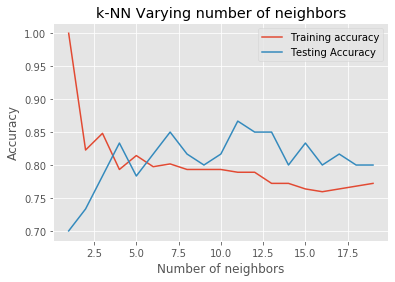

In [46]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.title('k-NN Varying number of neighbors')
plt.plot(n_neighbors, training_accuracy, label='Training accuracy')
plt.plot(n_neighbors, test_accuracy, label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### Comparativa entre el dataset normalizado y sin normalizar

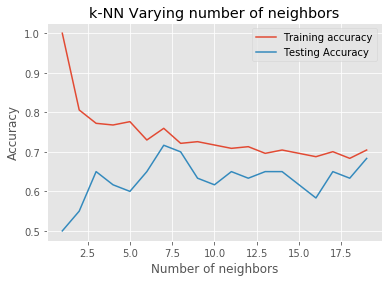

In [49]:
n_neighbors = range(1, 20)
weights ='uniform'
algorithm ='auto'

training_accuracy = []
test_accuracy = []

X_train, X_test, y_train, y_test = train_test_split(HD_features, HD_labels, test_size=0.2, random_state=5)

for i in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=i, weights=weights, algorithm=algorithm)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.title('k-NN Varying number of neighbors')
plt.plot(n_neighbors, training_accuracy, label='Training accuracy')
plt.plot(n_neighbors, test_accuracy, label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


### Conclusiones KNN
- Algoritmo sensible a normalizacion: como se ve en la comparativa, un dataset normalizado reduce el overfit y aumenta sus puntajes de entrenamiento y de prueba
- El hiperparametro de n_neighbors determina la cantidad de vecinos a considerar para la decision de la clase dado un punto.
- El hiperparametro weight determina el nivel de importancia de los vecinos mas cercanos en comparacion a los mas alejados. En este caso se usa el uniforme que los considera todos por igual.
- Se observa en ambos graficos, un valor de vecino (n_neighbor) bajo indica que el modelo mas complejo, mientras si se toma valor mas alto, la complejidad del modelo tiende a bajar.
- El hiperparametro n_neighbor alrededor de 7 representa un buen ajuste para que el algoritmo generalice bien.

---

## Random Forest

Import de dependencias

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [33]:
RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=20,n_estimators=500, max_depth= 3, random_state=10)

In [34]:
RandomForestModel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [35]:
y_predict = RandomForestModel.predict(X_test)

In [36]:
rf = accuracy_score(y_test,y_predict)
rf

0.7833333333333333